#**Building Linear Regression Model**  

creating linear regression as object

In [17]:
class Linear_Regression:
  def __init__(self, learning_rate, no_of_iterations): # self refers to the object so when you do model = linearRegression() self is model

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    # no_of_iterations refers to for how long we are going to update the parameters.. in order to update the parameter one time we need to go through the whole data.
    # learning rate and no_of_iterations are called hyper parameters because we set them by themselves
    # m and c are called model parameters because the model is setting them.

  def fit(self, X, Y):
    self.data_size = X.shape[0]
    self.no_of_features = X.shape[1]
    # these two attributes will be added to the self object after calling fit.
    self.X = X
    self.Y = Y
    # first we initiate the slope or weights and bias or intercept.
    self.weights = np.zeros(self.no_of_features)
    self.bias = 0

    # then we update the weights and the bias .
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction = self.predict(self.X)
    partial_derivate_to_weights = (-2 / self.data_size) * self.X.T.dot( self.Y - Y_prediction )
    partial_derivate_to_bias = (-2 / self.data_size) * np.sum( self.Y - Y_prediction )
    self.weights = self.weights - self.learning_rate * partial_derivate_to_weights
    self.bias = self.bias - self.learning_rate * partial_derivate_to_bias
  def predict(self, X):
    return X.dot(self.weights) + self.bias # the dot will be between each array in X and the weights and the bias will be added to each element in the resulting array.



import libraries

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

loading data

In [7]:
salary_df = pd.read_csv('salary_data.csv')
X = salary_df.drop(columns = 'Salary')
Y = salary_df.Salary

salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

split the data

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 2)


training the Linear Regression model

In [25]:
linear_regression = Linear_Regression(0.02, 1000)
linear_regression.fit(X_train, Y_train) # this is used to the model




<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


testing the model

In [26]:
Y_predict = linear_regression.predict(X_test)

visualise actual values and predicted values

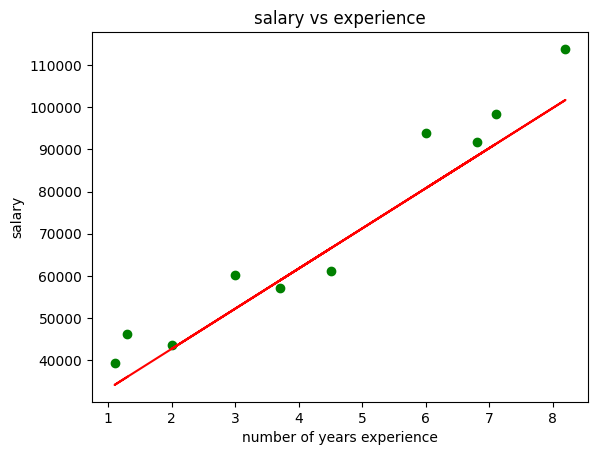

In [35]:
plt.scatter(X_test, Y_test, color = 'g')
plt.plot(X_test, Y_predict, color = 'r') # we should plot x-test and y-predict be because it is always a line
plt.xlabel('number of years experience')
plt.ylabel('salary')
plt.title('salary vs experience')
plt.show()